# test.fa に対する結果の図示

In [2]:
import subprocess
import matplotlib.pyplot as plt

# 実行時変数
EXE = "..\\a.exe"
IN_FILE = "../../CapR/test.fa"
OUT_FILE = "../test/out.txt"

def run_command(beam_size):
	command_state = f"{EXE} {IN_FILE} {OUT_FILE} {beam_size}"
	cp = subprocess.run(command_state, shell=True, capture_output=True, text=True)
	print(cp.stdout)
	print(cp.stderr)

In [3]:
def parse_output(out_file):
	structures = []
	probs = []
	with open(out_file, "r") as f:
		seq_name = f.readline()[1:]
		print(seq_name)
		for line in f:
			data = line.split()
			if len(data) == 0: continue
			structures.append(data[0])
			probs.append(list(map(float, data[1:])))
	return structures, probs

In [17]:
def show_graph(s, p, x1, x2):
	for i in range(len(s)):
		plt.plot(range(len(p[i])), p[i], label=s[i])

	plt.xlabel("nucleotide position")
	plt.ylabel("probability")
	# plt.ylim(-0.1, 1.1)
	plt.xlim(x1, x2)
	plt.legend(bbox_to_anchor=(1, 1),loc="upper left",fontsize=12)
	plt.show()

In [35]:
run_command(0)


URS0000ABD7E8 rRNA from 1 species



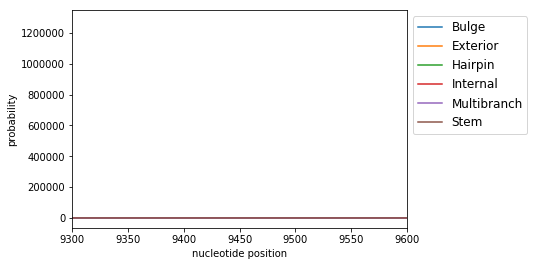

In [18]:
s, p = parse_output("../../dataset/out_LinearCapR/out_short_200.txt")
show_graph(s, p, 9300, 9600)

URS0000ABD7E8 rRNA from 1 species



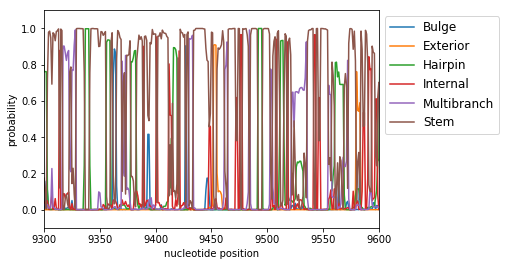

In [16]:
s, p = parse_output("../../dataset/out_CapR/out_short_200.txt")
show_graph(s, p, 9300, 9600)

In [51]:
beam = [5, 10, 20, 30, 40, 50, 100, 0]
for b in beam:
	run_command(b)
	print(b)
	s, p = parse_output(OUT_FILE)
	x = []
	for i in range(len(p[0])):
		p_sum = 0
		for j in range(len(s)):
			p_sum += p[j][i]
		x.append(p_sum)
	print(x)

	



5
M33000.1/55-110

[0.9999999, 0.9999992266685649, 1.0000003178200048, 0.9999999221538678, 0.9999999792900001, 1.00000038416, 1.000001009883563, 1.0002150991955299, 1.0002144649204, 1.0002403072460018, 1.00024106203, 1.000240741222, 1.000240981314, 1.000240451556, 1.000241247915604, 1.0002408387405717, 1.0002408844529593, 1.000240736485734, 1.0002406083212811, 1.0002403781673068, 1.0002413781028483, 1.0002402605872662, 1.0002406482317496, 1.0002404516697496, 1.00024037684931, 1.0002409047843, 1.000240630541, 1.0002412839929997, 1.000240390829, 1.000240441829, 1.000241409836, 1.0002405212889, 1.0002403025570001, 1.000240003160541, 1.000240803, 1.000240559, 1.000241099, 1.000240744, 1.000241208, 1.0002407067, 1.000240354, 1.0002146299999999, 1.0002152290000001, 1.000214939, 1.000214442, 1.0002148849999999, 1.000214165, 1.00021432254, 1.000215104832, 1.0000009129560001, 1.000001070945, 0.999999361914228, 0.999999980005112, 1.0000000251106014, 0.999999820694448, 0.9999998206900003]


10
